Fraudulent Transactions Prediction
About Dataset
• step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 
744 (30 days simulation).
• type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
• amount - amount of the transaction in local currency.
• nameOrig - customer who started the transaction
• oldbalanceOrg - initial balance before the transaction
• newbalanceOrig - new balance after the transaction
• nameDest - customer who is the recipient of the transaction
• oldbalanceDest - initial balance recipient before the transaction. Note that there is not 
information for customers that start with M (Merchants).
• newbalanceDest - new balance recipient after the transaction. Note that there is not 
information for customers that start with M (Merchants).
• isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this 
specific dataset the fraudulent behavior of the agents aims to profit by taking control or 
customers accounts and try to empty the funds by transferring to another account and then 
cashing out of the system.
• isFlaggedFraud - The business model aims to control massive transfers from one account to 
another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer
more than 200.000 in a single transaction.

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
#import imblearn
#from imblearn.under_sampling import NearMiss

In [134]:
#!pip install xgboost

In [135]:
df=pd.read_csv('Fraud.csv')

In [136]:
df.shape

(6362620, 11)

In [137]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [103]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe()

In [ ]:
df.duplicated().sum()

In [ ]:
df.corr()

In [ ]:
df.corr()['isFraud']

# Univariate Analysis



# 1]Categorical Data

In [ ]:
sns.countplot(df["isFraud"])
plt.show()

In [ ]:
sns.countplot(df["isFlaggedFraud"])
plt.show()

In [ ]:
df['isFlaggedFraud'].value_counts()

In [ ]:
df['isFraud'].value_counts()
#df['isFraud'].value_counts().plot(kind='bar')

In [ ]:
df["isFraud"].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

# we have an imbalanced dataset in which  99.87% of transactions are normal. Only about 0.13% of transactions are fraudulent.

In [ ]:
df["isFlaggedFraud"].value_counts().plot(kind='pie',autopct='%.5f')
plt.show()

In [ ]:
sns.countplot(df['type'])
plt.show()

In [ ]:
df['type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

# 2]Numerical Data

In [ ]:
df.head()

In [ ]:
plt.rcParams['figure.figsize'] =(14, 7)
sns.distplot(df.step, kde = True)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show();

In [ ]:
plt.hist(df['amount'])
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['oldbalanceOrg'])

plt.subplot(1,2,2)
plt.hist(df['newbalanceOrig'])

plt.show()


In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df['oldbalanceDest'])

plt.subplot(1,2,2)
plt.hist(df['newbalanceDest'])

plt.show()

In [ ]:
df.columns

# Outlier Detection by using Box-plot

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.boxplot(df['step'])

plt.subplot(2,3,2)
plt.boxplot(df['amount'])

plt.subplot(2,3,3)
plt.boxplot(df['oldbalanceOrg'])

plt.subplot(2,3,4)
plt.boxplot(df['newbalanceOrig'])

plt.subplot(2,3,5)
plt.boxplot(df['oldbalanceDest'])

plt.subplot(2,3,6)
plt.boxplot(df['newbalanceDest'])

plt.show()

# Bivariate Analysis

In [ ]:
df.columns

In [ ]:
df.sample(5)

In [ ]:
sns.barplot(df['type'],df['amount'],hue=df['isFraud'])

# From above observations it seem most of Fradulent tranctions was from TRANSFERS and CASH_OUT

In [ ]:
sns.scatterplot(df['step'],df['amount'])
plt.show()

In [ ]:
sns.scatterplot(df['oldbalanceOrg'],df['newbalanceOrig'],hue=df['isFraud'])

In [ ]:
sns.scatterplot(df['oldbalanceDest'],df['newbalanceDest'],hue=df['isFraud'])

In [ ]:
sns.barplot(df['type'],df['newbalanceOrig'])

In [ ]:
sns.barplot(df['type'],df['newbalanceDest'])

In [ ]:
sns.boxplot(df['isFraud'],df['amount'])

In [ ]:
# sns.pairplot(df)
# plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer',annot=True)

In [ ]:
df['type'].value_counts()

# first we take the differance between original_balance and destination_balanced

In [138]:
df['dest_increase']=df['newbalanceDest']-df['oldbalanceDest']
df['origin_bal_change']=df['oldbalanceOrg']-df['newbalanceOrig']

In [139]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change
6082905,522,CASH_IN,221353.07,C1771155603,628884.00,850237.07,C1856515353,565812.34,344459.26,0,0,-221353.08,-221353.07
272953,15,CASH_IN,299908.96,C311924766,84652.00,384560.96,C1029895699,0.00,0.00,0,0,0.00,-299908.96
1954243,178,CASH_OUT,49990.21,C603720164,760407.89,710417.68,C1544236481,2135211.57,2185201.78,0,0,49990.21,49990.21
109500,11,PAYMENT,5596.84,C267263436,3174.00,0.00,M207087125,0.00,0.00,0,0,0.00,3174.00
6021853,469,PAYMENT,15442.39,C238889348,15477.00,34.61,M1450655953,0.00,0.00,0,0,0.00,15442.39


# Condition 1}....so we should mark all the transactions where the newbalance becomes zero after cashout or transfer it is the possible fraud

In [140]:
condition_1=(df['newbalanceOrig']==0) & (df['origin_bal_change']==df['amount'])
df['possible_fraud']=0
df.loc[condition_1,'possible_fraud']=1

In [141]:
df[condition_1].sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud
3760285,279,CASH_OUT,10000000.00,C951363139,10000000.00,0.0,C241707602,0.00,10000000.00,1,0,10000000.00,10000000.00,1
6302241,683,CASH_OUT,34502.70,C1979899014,34502.70,0.0,C15770449,0.00,34502.70,1,0,34502.70,34502.70,1
1030616,78,CASH_OUT,1321091.25,C1817853136,1321091.25,0.0,C1040572676,0.00,1321091.25,1,0,1321091.25,1321091.25,1
6118828,537,CASH_OUT,1504.73,C237626007,1504.73,0.0,C649046930,26284.34,27789.07,1,0,1504.73,1504.73,1
3192345,241,CASH_OUT,110344.11,C1641368956,110344.11,0.0,C329210788,127320.42,237664.52,1,0,110344.10,110344.11,1


In [142]:
df['possible_fraud'].value_counts()

0    6354596
1       8024
Name: possible_fraud, dtype: int64

In [143]:
df.loc[724,]

step                          1
type                   CASH_OUT
amount                416001.33
nameOrig             C749981943
oldbalanceOrg               0.0
newbalanceOrig              0.0
nameDest             C667346055
oldbalanceDest            102.0
newbalanceDest       9291619.62
isFraud                       1
isFlaggedFraud                0
dest_increase        9291517.62
origin_bal_change           0.0
possible_fraud                0
Name: 724, dtype: object

# Condition 2}... Newbalance change in Destination is zero whether the transaction is transfer or cashout it is the fraud transaction

In [144]:
condition_2 = (((df['dest_increase']==0.0) & (df['amount']>0)) & (df['possible_fraud']==0))
df.loc[condition_2,'possible_fraud']=1

In [145]:
df[condition_2].sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud
5435760,378,PAYMENT,4630.12,C606165682,175289.69,170659.57,M1256034512,0.0,0.0,0,0,0.0,4630.12,1
1098964,130,PAYMENT,15017.25,C460739460,595.00,0.00,M860239712,0.0,0.0,0,0,0.0,595.00,1
4042565,300,PAYMENT,6957.52,C85017431,41840.48,34882.96,M930542471,0.0,0.0,0,0,0.0,6957.52,1
6104993,525,PAYMENT,3613.62,C630910802,14443.00,10829.38,M676772961,0.0,0.0,0,0,0.0,3613.62,1
5933860,404,PAYMENT,22863.23,C1945785635,146698.00,123834.77,M887714519,0.0,0.0,0,0,0.0,22863.23,1


In [146]:
df['possible_fraud'].value_counts()

0    4041232
1    2321388
Name: possible_fraud, dtype: int64

In [147]:
# df["possible_fraud"].value_counts().plot(kind='pie',autopct='%.2f')
# plt.show()

In [114]:
#df.columns

In [115]:
#df[(df['isFraud']==1) & (df['possible_fraud']==0)]

# Condition 3}... oldbalanceOrg in which balanced is zero whether the transaction is transfer or cashout it is the fraud transaction

In [148]:
condition_3 = (((df['oldbalanceOrg']==0.0) & (df['amount']>0)) & (df['possible_fraud']==0))
df.loc[condition_3,'possible_fraud']=1

In [149]:
df5=df[condition_3]

In [150]:
df['possible_fraud'].value_counts()

1    3649067
0    2713553
Name: possible_fraud, dtype: int64

In [151]:
final_data=df.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud','dest_increase','origin_bal_change'],axis=1)

In [152]:
final_data.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,possible_fraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,1


<AxesSubplot:>

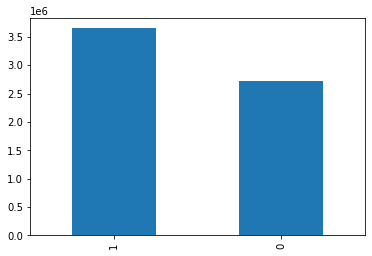

In [153]:
final_data['possible_fraud'].value_counts().plot(kind='bar')

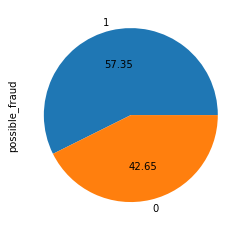

In [154]:
final_data["possible_fraud"].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [155]:
final_data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,possible_fraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,1
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,1
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,1
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [156]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder_df = pd.DataFrame(encoder.fit_transform(final_data[['type']]).toarray(),columns=['CASH_OUT','DEBIT','PAYMENT','TRANSFER'])
final_df = final_data.join(encoder_df)
final_data=final_df.drop(['type'],axis=1)

In [157]:
final_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,possible_fraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,1,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,19384.72,0.00,0.00,1,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,0.00,0.00,1,0.0,0.0,0.0,1.0
3,1,181.00,181.00,0.00,21182.00,0.00,1,1.0,0.0,0.0,0.0
4,1,11668.14,41554.00,29885.86,0.00,0.00,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1.0,0.0,0.0,0.0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0.0,0.0,0.0,1.0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1.0,0.0,0.0,0.0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0.0,0.0,0.0,1.0


<AxesSubplot:>

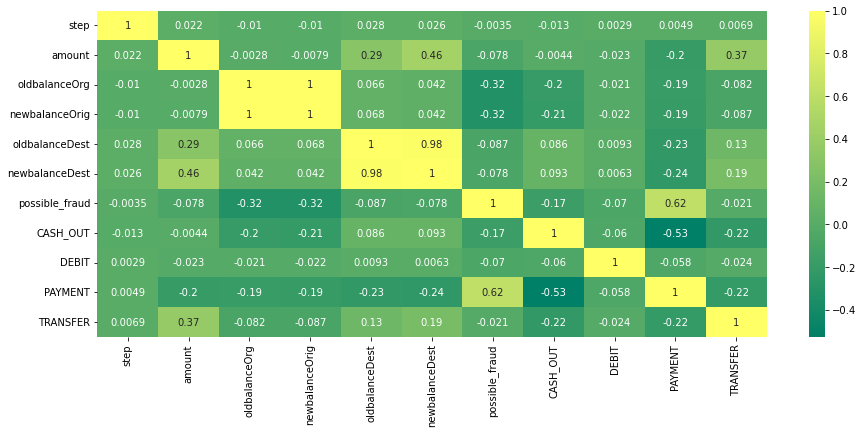

In [158]:
plt.figure(figsize=(15,6))
sns.heatmap(final_data.corr(), cmap='summer',annot=True)

In [159]:
X=final_data.drop(['possible_fraud','oldbalanceOrg','newbalanceDest'],axis=1)
y=final_data['possible_fraud']

<AxesSubplot:>

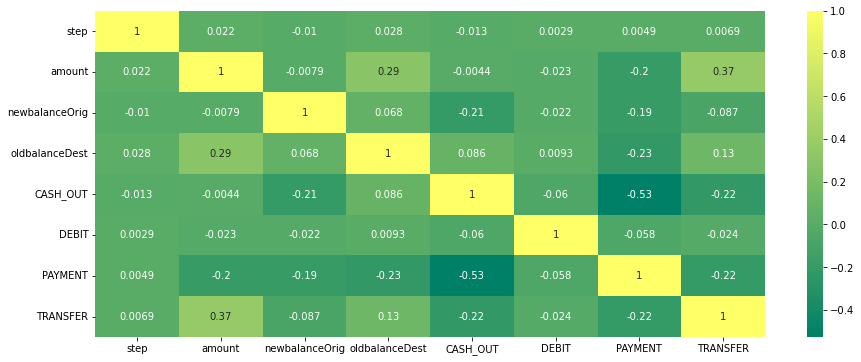

In [160]:
plt.figure(figsize=(15,6))
sns.heatmap(X.corr(), cmap='summer',annot=True)

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=41)

In [163]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4262955, 8) (4262955,) (2099665, 8) (2099665,)


In [165]:
x_train

,step,amount,newbalanceOrig,oldbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1872777,164,8832.10,162018.38,0.00,0.0,0.0,1.0,0.0
1226430,133,1410.21,0.00,0.00,0.0,0.0,1.0,0.0
3343351,253,8911.67,0.00,0.00,0.0,0.0,1.0,0.0
2299214,188,8235.63,8235.63,325832.75,0.0,0.0,0.0,0.0
433479,18,51807.60,0.00,2816340.66,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4445264,323,24436.26,0.00,2903032.44,1.0,0.0,0.0,0.0
2838498,226,421854.97,438558.97,579444.76,0.0,0.0,0.0,0.0
5042060,354,254761.03,8415790.14,1793488.34,0.0,0.0,0.0,0.0
3802019,281,96109.65,0.00,0.00,0.0,0.0,0.0,1.0


In [166]:
y_train

1872777    1
1226430    1
3343351    1
2299214    1
433479     1
          ..
4445264    1
2838498    0
5042060    0
3802019    0
3966912    0
Name: possible_fraud, Length: 4262955, dtype: int64

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

# LOGISTIC REGRESSION

In [169]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print('ROC AUC Score:',roc_auc_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.8018267571626139
F1 Score: 0.7950575813518777
Confusion Matrix:
 [[797550  99122]
 [343818 859175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78    896672
           1       0.90      0.71      0.80   1202993

    accuracy                           0.79   2099665
   macro avg       0.80      0.80      0.79   2099665
weighted avg       0.81      0.79      0.79   2099665

Accuracy Score: 0.789042537738163


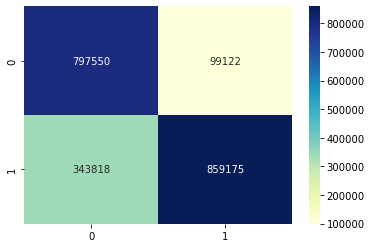

In [170]:
sns.heatmap((confusion_matrix(y_test,lr_pred)),annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [171]:
print('Training set score: {:.4f}'.format(lr.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(lr.score(x_test, y_test)))

Training set score: 0.7898
Test set score: 0.7890


# XGBOOST

In [172]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
print("ROC AUC Score:",roc_auc_score(y_test,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))
print("Accuracy Score:",accuracy_score(y_test,xgb_pred))

ROC AUC Score: 0.881028263184777
Confusion Matrix:
 [[ 689429  207243]
 [   8203 1194790]]
F1 Score: 0.9172960269878304
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.86    896672
           1       0.85      0.99      0.92   1202993

    accuracy                           0.90   2099665
   macro avg       0.92      0.88      0.89   2099665
weighted avg       0.91      0.90      0.89   2099665

Accuracy Score: 0.8973902979761057


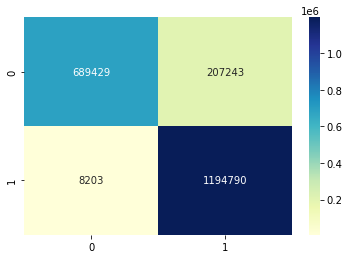

In [173]:
sns.heatmap((confusion_matrix(y_test,xgb_pred)),annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [174]:
print('Training set score: {:.4f}'.format(xgb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(xgb.score(x_test, y_test)))

Training set score: 0.9014
Test set score: 0.8974


# LIGHT GBM

In [175]:
import lightgbm as Lgb

In [176]:
#!pip install lightgbm

In [177]:
lgb = Lgb.LGBMClassifier()
lgb.fit(x_train, y_train)

LGBMClassifier()

In [178]:
lgb_pred=lgb.predict(x_test)

In [179]:
print("ROC AUC Score:",roc_auc_score(y_test,lgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,lgb_pred))
print("F1 Score:",f1_score(y_test,lgb_pred))
print("Classification Report:\n",classification_report(y_test,lgb_pred))
print("Accuracy Score:",accuracy_score(y_test,lgb_pred))

ROC AUC Score: 0.8806087921680164
Confusion Matrix:
 [[ 688354  208318]
 [   7770 1195223]]
F1 Score: 0.917097570950542
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.86    896672
           1       0.85      0.99      0.92   1202993

    accuracy                           0.90   2099665
   macro avg       0.92      0.88      0.89   2099665
weighted avg       0.91      0.90      0.89   2099665

Accuracy Score: 0.8970845349139029


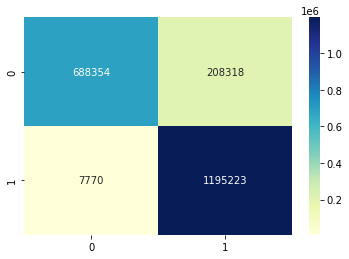

In [180]:
sns.heatmap((confusion_matrix(y_test,lgb_pred)),annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [181]:
print('Training set score: {:.4f}'.format(lgb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(lgb.score(x_test, y_test)))

Training set score: 0.9012
Test set score: 0.8971


# Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV

# Hyperparameter Tune for XGBOOST

In [182]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [183]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [185]:
classifier=XGBClassifier()

In [186]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [187]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [188]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [189]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [190]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.3, learning_rate=0.3,max_depth=6, min_child_weight=7,n_estimators=100, n_jobs=1)



In [191]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train,cv=10)

In [192]:
score

array([0.90017265, 0.90054563, 0.90031574, 0.90016092, 0.90067699,
       0.90071899, 0.90032958, 0.90035773, 0.90099579, 0.90164792])

In [193]:
score.mean()

0.9005921951062202

In [194]:
print("Performance of ML Models:")
print('Predictive Accuracy of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Predictive Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')
print('Predictive Accuracy of light GBM Classifier:',str(np.round(accuracy_score(y_test,lgb_pred)*100,2)) + '%')

Performance of ML Models:
Predictive Accuracy of Logistic Regression: 78.9%
Predictive Accuracy of XGBoost Classifier: 89.74%
Predictive Accuracy of light GBM Classifier: 89.71%
